In [1]:
import Pkg; 
Pkg.activate(joinpath(@__DIR__,"..")); 
Pkg.instantiate()

using ForwardDiff
using LinearAlgebra
using Statistics
using Plots
plotlyjs()
using Printf
using Random
using DifferentialEquations

  Activating project at `~/Desktop/Work/Courses/OCRL-Walker-Project/juliaImplementation/juliaImplementation`


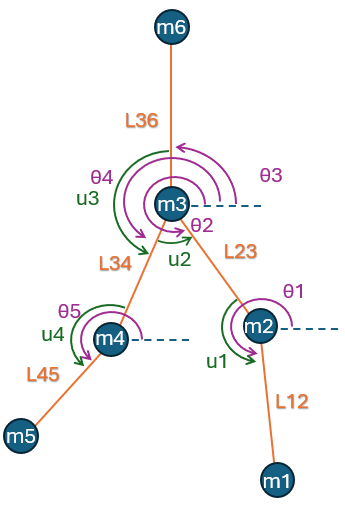

t: 0 
iter: 1    |r|: 1346.4453900482413   
iter: 2    |r|: 195.94613222304685   
iter: 3    |r|: 13.238603101748236   
iter: 4    |r|: 1.617339851859478   
iter: 5    |r|: 0.12776540629047548   
iter: 6    |r|: 0.015414335147754492   
iter: 7    |r|: 0.0010174777603164644   
iter: 8    |r|: 0.00014230482050197466   
iter: 9    |r|: 7.6994526979804e-6   
iter: 10    |r|: 1.36263573370151e-6   
iter: 11    |r|: 5.168952222206366e-8   
t: 0.01 
iter: 1    |r|: 650.7448513100861   
iter: 2    |r|: 10.331202198932122   
iter: 3    |r|: 1.300388033045382   
iter: 4    |r|: 0.14824152497860696   
iter: 5    |r|: 0.01631748829530184   
iter: 6    |r|: 0.001765131721122741   
iter: 7    |r|: 0.00018943468730185024   
iter: 8    |r|: 2.0254245544127494e-5   
iter: 9    |r|: 2.1617424222020397e-6   
iter: 10    |r|: 2.3052898934382785e-7   
iter: 11    |r|: 2.4571772097117827e-8   
t: 0.02 
iter: 1    |r|: 551.397157424138   
iter: 2    |r|: 24.411448256660083   
iter: 3    |r|: 0.63215637346234

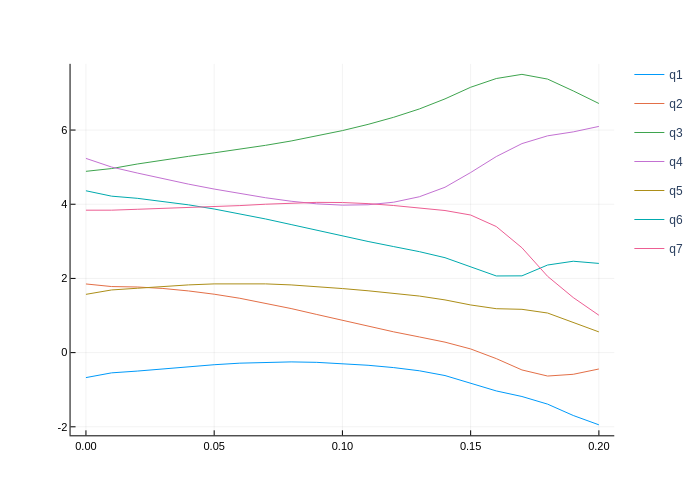

In [4]:
include("DynamicSystems/biped5link.jl") # Defines hybrid system functions

params = ( m1 = 1,  m2 = 1,  m3 = 1,  m4 = 1,  m5 = 1, m6 = 1,
		      l12 = 1, l23 = 1, l34 = 1, l45 = 1, l36 = 1, g = 9.81)


foot1_pos = [0, 0]

θ1 = 280 * (π/180)
θ2 = 300 * (π/180)
θ3 = 90 * (π/180)
θ4 = 250 * (π/180)
θ5 = 220 * (π/180)

x0 = - params.l23 * cos(θ2) - params.l12 * cos(θ1)
y0 = - params.l23 * sin(θ2) - params.l12 * sin(θ1)

q0 = [x0, y0, θ1, θ2, θ3, θ4, θ5]
q̇0 = zeros(7)

A = 10
ω = 2π
# u = _t -> [0, A*sin(ω*_t), 0, 0]
u = _t -> [0,0,0,0]

joints = biped5link_kinematics(q0, params)

fpos = joints[1:2,:]

h = 0.01 
tf = 0.2
T = Int.(tf/h)+1
times = h .* (0:T-1)
q_hist, q̇_hist, λ_hist = simulate(q0, q̇0, u, params, fpos, left_foot_constraint, h, T);

plot()
[plot!(times, q_hist[:,i], label="q$i") for i in 1:7]
display(plot!())

┌ Info: Saved animation to 
│   fn = /home/sman/Desktop/Work/Courses/OCRL-Walker-Project/juliaImplementation/juliaImplementation/src/5_link_walker.gif
└ @ Plots /home/sman/.julia/packages/Plots/NQpB8/src/animation.jl:114


Plots.AnimatedGif("/home/sman/Desktop/Work/Courses/OCRL-Walker-Project/juliaImplementation/juliaImplementation/src/5_link_walker.gif")
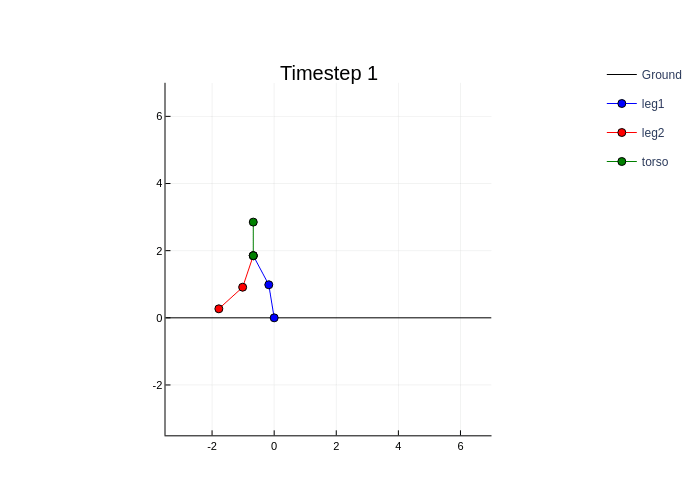

In [5]:
include("DynamicSystems/animate_walker.jl")

animate_walker([q_hist q̇_hist]', params)
